# STOCK PRICE PREDICTION
                                    -Domavarapu Rahul,NIT Durgapur
                  

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

**DATA PREPARTION/PREPROCESSING**

In [2]:
df = pd.read_csv('C:\\Users\\Rahul Domavarapu\\Downloads\\NSE-TATAGLOBAL11.csv')

#print the head
df.head()
print(len(df))

1235


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size= 7
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(7, 1))
    Y.append(np.array(temp2).reshape(1, 1))


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,7,1)
test_X = test_X.reshape(test_X.shape[0],1,7,1)

print(len(train_X))
print(len(test_X))

980
246


**BUILDING THE MODEL**

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [7]:
# For creating model and training
model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu',padding = 'same',input_shape=(None,7, 1))))
model.add(TimeDistributed(MaxPooling1D(2,padding = 'same')))
model.add(TimeDistributed(Conv1D(128, kernel_size=3,padding = 'same',activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2,padding = 'same')))
model.add(TimeDistributed(Conv1D(64, kernel_size=3,padding = 'same',activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2,padding = 'same')))
# model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(7, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(7, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
25/25 [==============================] - 25s 187ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0356 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0293
Epoch 2/40
25/25 [==============================] - 0s 18ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0256 - val_loss: 9.3733e-04 - val_mse: 9.3733e-04 - val_mae: 0.0221
Epoch 3/40
25/25 [==============================] - 0s 19ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0237 - val_loss: 7.2643e-04 - val_mse: 7.2643e-04 - val_mae: 0.0185
Epoch 4/40
25/25 [==============================] - 0s 20ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0236 - val_loss: 6.3555e-04 - val_mse: 6.3555e-04 - val_mae: 0.0172
Epoch 5/40
25/25 [==============================] - 1s 20ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0233 - val_loss: 8.0282e-04 - val_mse: 8.0282e-04 - val_mae: 0.0214
Epoch 6/40
25/25 [==============================] - 1s 21ms/step - loss: 8.3144e-04 - mse: 8.3144e-04 - mae: 0.0207 - val_loss: 5.8635e-04 - val_mse: 5

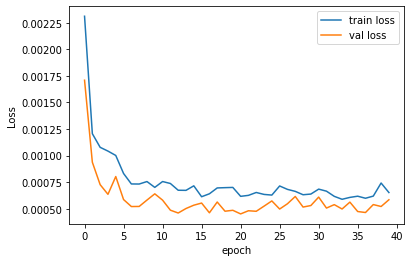

In [9]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 64)         256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 4, 64)         0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 4, 128)        24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 2, 128)        0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 2, 64)         2

In [11]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 9ms/step - loss: 5.8444e-04 - mse: 5.8444e-04 - mae: 0.0168


[0.0005844352417625487, 0.0005844352417625487, 0.01677684113383293]

In [12]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = df.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


8/8 [==============================] - 4s 6ms/step


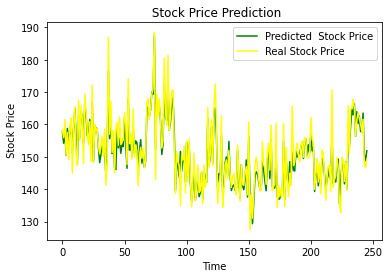

In [13]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()